In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from typing import List

def display_image_grid(image_paths: List[str]):
    """
    Displays a dynamic number of images in a two-column grid, adjusting the
    figure size to match the image aspect ratio and remove extra space.
    """
    if not image_paths:
        print("No images to display.")
        return

    # --- 1. Get aspect ratio from the first image ---
    # This assumes all images have a similar aspect ratio
    sample_img = mpimg.imread(image_paths[0])
    height, width, _ = sample_img.shape
    aspect_ratio = height / width

    # --- 2. Calculate grid and dynamic figure size ---
    cols = 2
    rows = math.ceil(len(image_paths) / cols)
    
    # Set a total width for the figure and calculate the height to match aspect ratio
    total_width_inches = 12
    row_height_inches = (total_width_inches / cols) * aspect_ratio
    total_height_inches = row_height_inches * rows

    # --- 3. Create the grid of subplots with the new figsize ---
    fig, axes = plt.subplots(rows, cols, figsize=(total_width_inches, total_height_inches))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten() if len(image_paths) > 1 else [axes]

    # --- 4. Populate the subplots with images ---
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    # --- 5. Hide any unused subplots ---
    for i in range(len(image_paths), len(axes)):
        axes[i].axis('off')

    # Use constrained_layout for better spacing
    plt.constrained_layout()
    plt.show()

In [2]:
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont
import glob

# --- Create a directory for our sample images ---
image_dir = Path("./sample_images")
image_dir.mkdir(exist_ok=True)

# --- Generate 5 sample images for demonstration ---
for i in range(5):
    # Create a blank image
    img = Image.new('RGB', (200, 150), color = (73, 109, 137))
    d = ImageDraw.Draw(img)
    # Add text to the image
    try:
        # Try to use a common font
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        # Use a default font if the specific one isn't found
        font = ImageFont.load_default()
    d.text((50, 60), f"Image {i+1}", fill=(255, 255, 0), font=font)
    # Save the image
    img.save(image_dir / f"image_{i+1}.png")

In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
# load utils
from src.category_descriptor_selection import *
from src.make_dataset.split_data import *

In [10]:
train_ids, val_ids, test_ids = load_splits_triplet(out_dir="../data/splits", name = 'original')

In [11]:
DATA_DIR = Path("../data/")
DEAM_CORE_PATH = DATA_DIR / "processed/core_dataset.parquet"
df_core = pd.read_parquet(DEAM_CORE_PATH)
labels_df = df_core[['valence_mean', 'arousal_mean']]

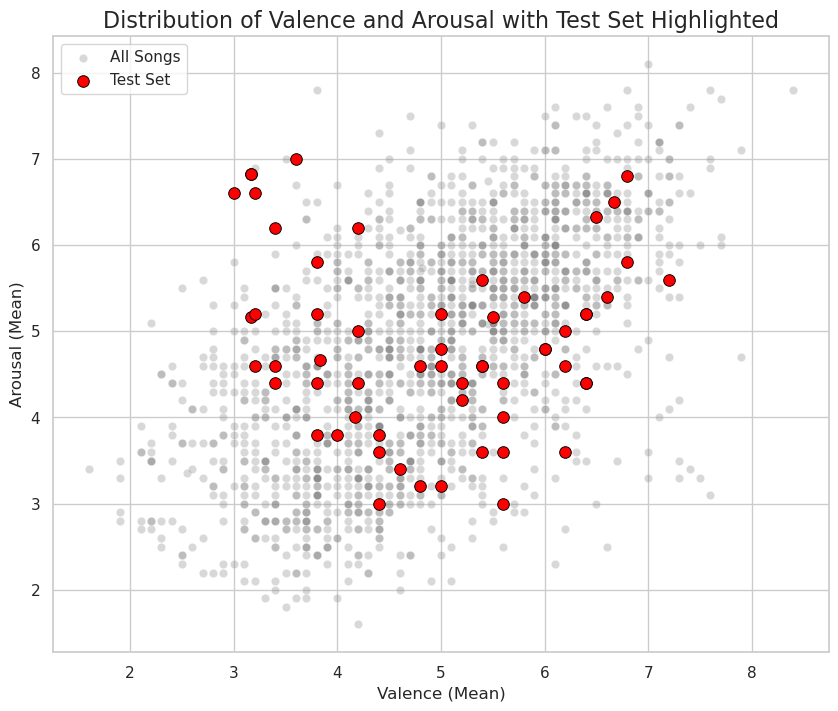

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Prepare data for plotting ---
# The main DataFrame with all songs
all_songs_df = df_core
# Create a new DataFrame containing only the songs from your test set
test_songs_df = df_core[df_core['song_id'].isin(test_ids)]


# --- 2. Create the plot ---
# Set the visual style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot all songs in the background (light grey and semi-transparent)
sns.scatterplot(
    data=all_songs_df,
    x='valence_mean',
    y='arousal_mean',
    color='grey',
    alpha=0.3,
    label='All Songs'
)

# Plot the test songs on top (red, larger, and with an edge)
sns.scatterplot(
    data=test_songs_df,
    x='valence_mean',
    y='arousal_mean',
    color='red',
    s=70,  # Increase marker size
    edgecolor='black',
    label='Test Set'
)

# --- 3. Finalize and display the plot ---
plt.title('Distribution of Valence and Arousal with Test Set Highlighted', fontsize=16)
plt.xlabel('Valence (Mean)', fontsize=12)
plt.ylabel('Arousal (Mean)', fontsize=12)
plt.legend()
plt.show()

Displaying 16 images...


AttributeError: module 'matplotlib.pyplot' has no attribute 'constrained_layout'

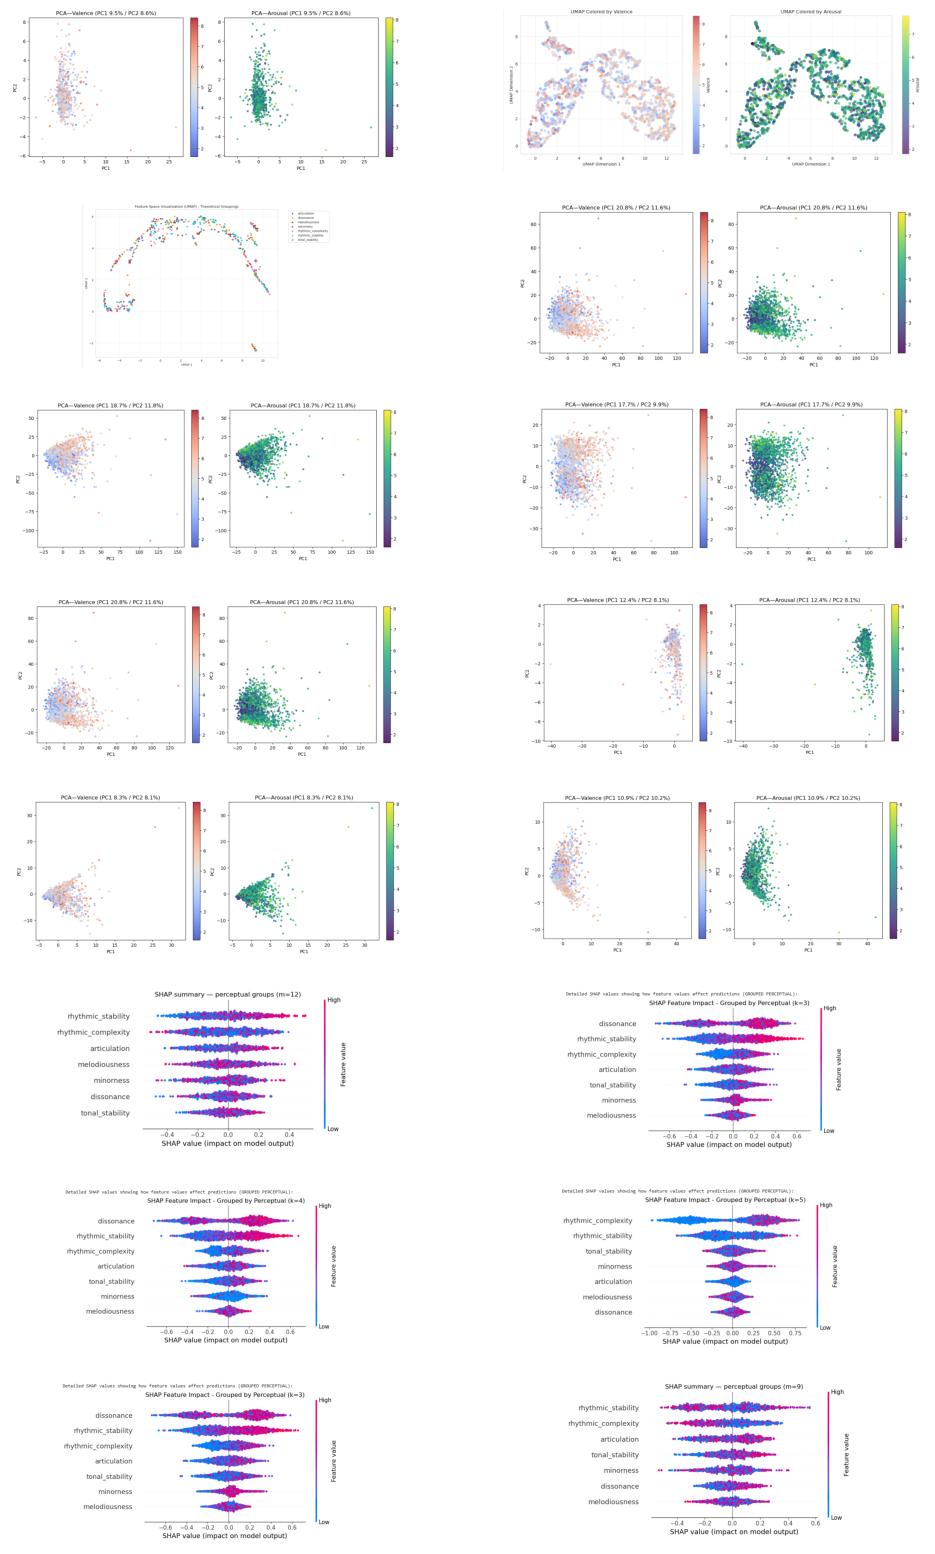

In [13]:
# --- Get the list of all created image paths ---
# Use glob to find all .png files in the directory
image_files = glob.glob(str(image_dir / "*.png"))
image_files.sort() # Sort the files to ensure a consistent order

# --- Use the function to display the images ---
print(f"Displaying {len(image_files)} images...")
display_image_grid(image_files)